In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Read the CSV file into a DataFrame
df = pd.read_csv('Base.csv')

In [2]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


# hypothesis 1: high name_email_similarity is indicative of lower fraud rates.

Mean name_email_similarity for fraud cases: 0.39316142802688536
Mean name_email_similarity for legitimate cases: 0.4948152347980061


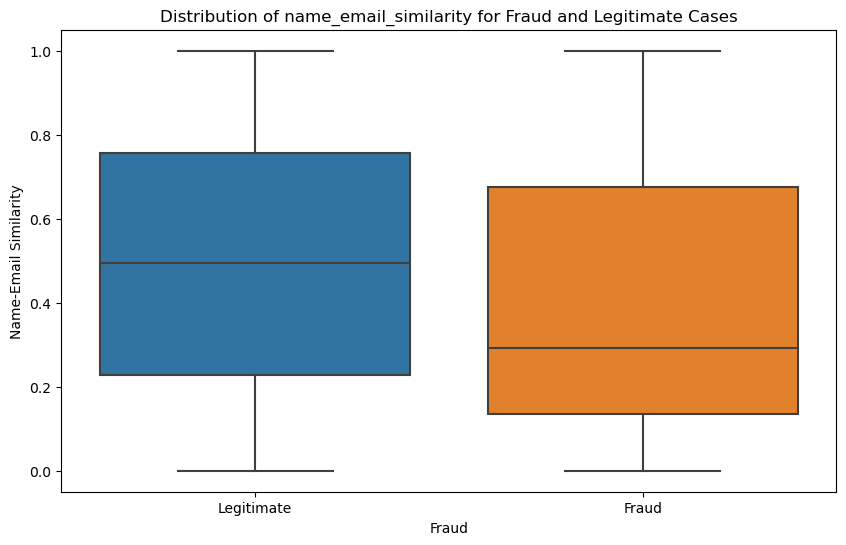

T-Statistic: -36.74437927596489
P-Value: 2.2555045287464665e-295
Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.


In [3]:
# hypothesis 1
# high name_email_similarity is indicative of lower fraud rates.

fraud_mean_similarity = df[df['fraud_bool'] == 1]['name_email_similarity'].mean()
legit_mean_similarity = df[df['fraud_bool'] == 0]['name_email_similarity'].mean()

print("Mean name_email_similarity for fraud cases:", fraud_mean_similarity)
print("Mean name_email_similarity for legitimate cases:", legit_mean_similarity)

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_bool', y='name_email_similarity', data=df)
plt.title('Distribution of name_email_similarity for Fraud and Legitimate Cases')
plt.xlabel('Fraud')
plt.ylabel('Name-Email Similarity')
plt.xticks([0, 1], ['Legitimate', 'Fraud'])
plt.show()

# Statistical Testing
t_stat, p_value = ttest_ind(df[df['fraud_bool'] == 1]['name_email_similarity'],
                             df[df['fraud_bool'] == 0]['name_email_similarity'])

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in name_email_similarity between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in name_email_similarity between fraud and legitimate cases.")


In [5]:
# the significant difference in name_email_similarity between fraud and legitimate cases suggest that 'name_email_similarity' is an important feature as an indication of fraud.
#the significantly lower mean name_email_similarity for fraud cases compared to legitimate cases supports the hypothesis that higher name_email_similarity may indicate lower fraud rates.
#this implies that there may be a pattern or correlation between lower name_email_similarity and fraudulent behavior, suggesting that applicants with higher name-email dissimilarity may be more likely to engage in fraudulent activities.

In [42]:
# test for normality of predictive features

# check normality for fraudulent cases
stat_fraud, p_fraud = shapiro(df[df['fraud_bool'] == 1]['name_email_similarity'])
print("Shapiro-Wilk test for fraud cases:")
print("Statistic:", stat_fraud)
print("P-Value:", p_fraud)

# check normality for legitimate cases
stat_legit, p_legit = shapiro(df[df['fraud_bool'] == 0]['name_email_similarity'])
print("\nShapiro-Wilk test for legit cases:")
print("Statistic:", stat_legit)
print("P-Value:", p_legit)

Shapiro-Wilk test for fraud cases:
Statistic: 0.8980927467346191
P-Value: 0.0

Shapiro-Wilk test for legit cases:
Statistic: 0.9459354877471924
P-Value: 0.0


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [7]:
# things to note:
# Shapiro-Wilk test may not be accurate since sample size is > 5000

# suppose choose significance level = 0.05 
# p value for both fraud and legit cases are very small, less than significance level
# cannot assume distribution of 'name_email_similarity' for both cases is normal - so using t-test is not accurate


# # alternative is usr feature engineering
# create categorical bins using 'name_email_similarity'and visualize the distribution of the new categorical feature for fraud and legit cases
# transform the continuous name_email_similarity feature into a categorical feature



/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


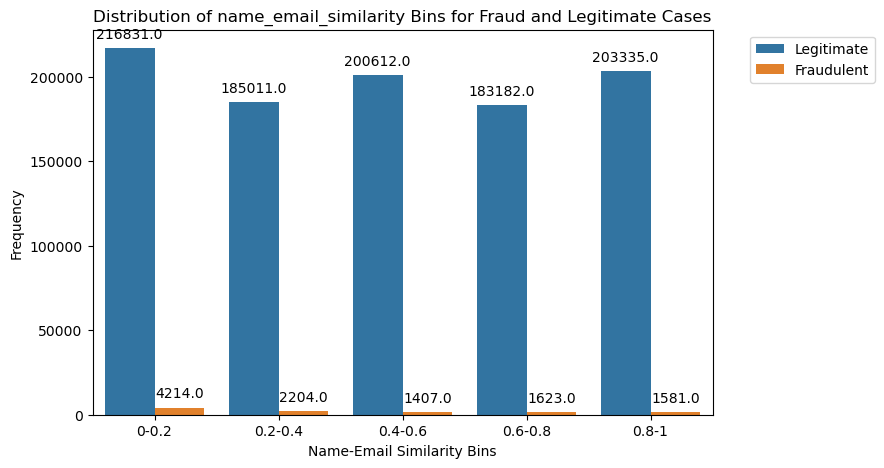

In [9]:
# create categorical bins

bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]  # specify the bin edges

# define bin labels
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=bin_edges, labels=bin_labels)

#  distribution of the new feature

plt.figure(figsize=(8, 5))

# Convert 'fraud_bool' to strings just for plotting
df_plot = df.copy()
df_plot['fraud_bool'] = df_plot['fraud_bool'].astype(str)

ax = sns.countplot(x='name_email_similarity_bins', hue='fraud_bool', data=df_plot)
plt.title('Distribution of name_email_similarity Bins for Fraud and Legitimate Cases')
plt.xlabel('Name-Email Similarity Bins')
plt.ylabel('Frequency')

# Show value of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Move the legend to the upper right
plt.legend(['Legitimate', 'Fraudulent'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()






In [95]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,name_email_similarity_bins,credit_risk_score_bins,session_length_bins,emails_bin,credit_risk_score_bin
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,linux,1,1,0,0,0.8-1,100-200,0-20,0-10,100-200
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,other,1,1,0,0,0.6-0.8,100-200,0-20,10-20,100-200
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,windows,0,1,0,0,0.8-1,0-100,20-40,10-20,0-100
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,linux,1,1,0,0,0.4-0.6,0-100,0-20,10-20,0-100
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,other,0,1,0,0,0.8-1,0-100,0-20,0-10,0-100


/tmp/ipykernel_93010/500808683.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportions = df.groupby('name_email_similarity_bins')['fraud_bool'].mean()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


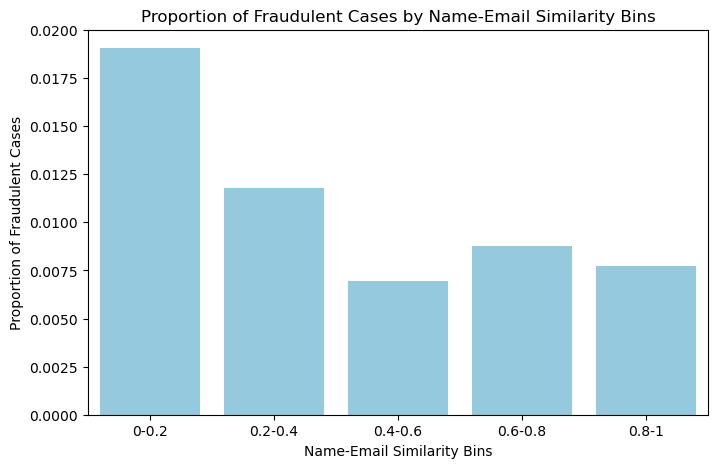

Chi-square Statistic: 1915.623944813102
P-Value: 0.0


In [10]:
df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=5, labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]  # specify the bin edges

# define bin labels
bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']

df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=bin_edges, labels=bin_labels)

# calculate the proportion of fraudulent cases within each similarity bin
fraud_proportions = df.groupby('name_email_similarity_bins')['fraud_bool'].mean()

# plot the proportion of fraudulent cases by similarity bin
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_proportions.index, y=fraud_proportions.values, color='skyblue')
plt.title('Proportion of Fraudulent Cases by Name-Email Similarity Bins')
plt.xlabel('Name-Email Similarity Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.show()

# statistical testing using Chi-square test
contingency_table = pd.crosstab(df['name_email_similarity_bins'], df['fraud_bool'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-Value:", p)

In [13]:
# to note:
# proportion of fraud in each bin = number of fraud accs in the bin / total number of accs in the bin


# the high chi-square value indicates a larger discrepancy between the observed and expected frequencies, suggesting a stronger association between name_email_similarity_bins and fraud occurrence.

# low p-value suggest strong evidence indicating that the observed association between name_email_similarity_bins and fraud occurrence is unlikely to be due to random chance.

# results provide strong evidence that there is a significant association between the level of name-email similarity and the likelihood of fraud occurrence. 
# the proportion of fraudulent cases varies significantly across different similarity bins
# this supports the hypothesis that high name_email_similarity is indicative of lower fraud rates.



Chi-square Statistic for Credit Risk Score Bins: 6409.052695890701
P-Value for Credit Risk Score Bins: 0.0
Reject the null hypothesis. There is a significant association between Credit Risk Score Bins and fraud occurrence.


/tmp/ipykernel_93010/2809864459.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportions_credit = df.groupby('credit_risk_score_bins')['fraud_bool'].mean()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


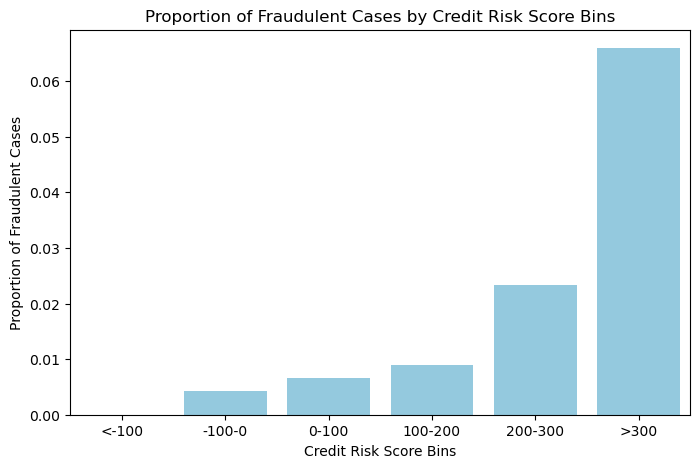

In [17]:
# Specify the bin edges for credit_risk_score
credit_risk_bin_edges = [-176, -100, 0, 100, 200, 300, 400]
credit_risk_bin_labels = ['<-100', '-100-0', '0-100', '100-200', '200-300', '>300']

# Create 'credit_risk_score_bins' column
df['credit_risk_score_bins'] = pd.cut(df['credit_risk_score'], bins=credit_risk_bin_edges, labels=credit_risk_bin_labels)

contingency_table_credit = pd.crosstab(df['credit_risk_score_bins'], df['fraud_bool'])

# chi-square test of independence
chi2_credit, p_credit, dof_credit, expected_credit = chi2_contingency(contingency_table_credit)

print("\nChi-square Statistic for Credit Risk Score Bins:", chi2_credit)
print("P-Value for Credit Risk Score Bins:", p_credit)

if p_credit < 0.05:
    print("Reject the null hypothesis. There is a significant association between Credit Risk Score Bins and fraud occurrence.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Credit Risk Score Bins and fraud occurrence.")

# plot proportion of fraudulent cases by credit risk score bins
fraud_proportions_credit = df.groupby('credit_risk_score_bins')['fraud_bool'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_proportions_credit.index, y=fraud_proportions_credit.values, color='skyblue')
plt.title('Proportion of Fraudulent Cases by Credit Risk Score Bins')
plt.xlabel('Credit Risk Score Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.show()

In [84]:
# large chi-square statistic and a low p-value indicate a significant association between credit risk score bins and fraud occurrence.

# suggest that credit risk score of an applicant is significantly associated with the occurrence of fraud
# applicants with different credit risk scores may exhibit different levels of fraudulent behavior

# seems like higher credit risk score is indicative of higher fraud occurences

# appears that credit risk score could potentially serve as an important predictor for fraud detection and prevention strategies.

In [19]:
# test the effectiveness of using name_email_similarity and credit_risk_score as important predictor for fraud detection and prevention strategies.

/tmp/ipykernel_93010/1185817744.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('credit_risk_score_bins').agg({'name_email_similarity': 'mean', 'fraud_bool': 'mean'}).reset_index()


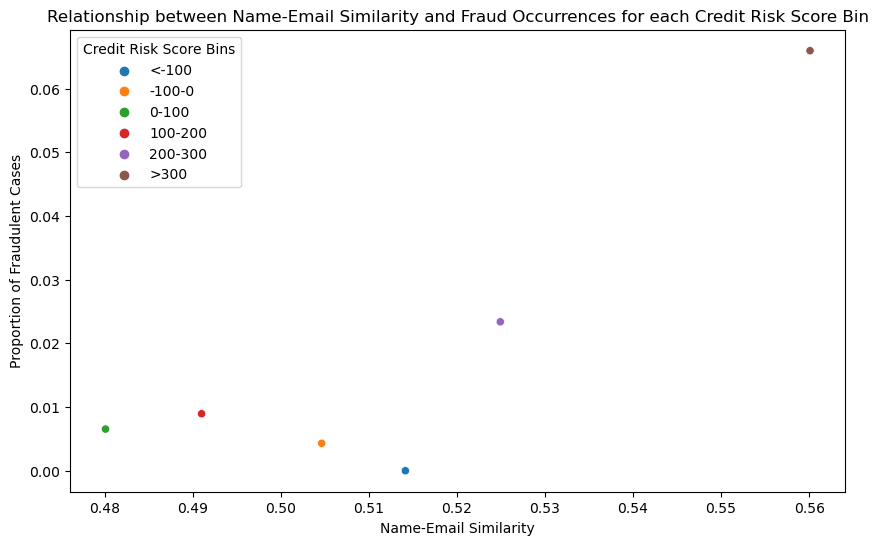

In [20]:
# 'name_email_similarity' and 'credit_risk_score' with fraud occurence

# Create categorical bins for 'name_email_similarity' and 'credit_risk_score'
name_email_bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1]
name_email_bin_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1']
credit_risk_bin_edges = [-176, -100, 0, 100, 200, 300, 400]
credit_risk_bin_labels = ['<-100', '-100-0', '0-100', '100-200', '200-300', '>300']

df['name_email_similarity_bins'] = pd.cut(df['name_email_similarity'], bins=name_email_bin_edges, labels=name_email_bin_labels)
df['credit_risk_score_bins'] = pd.cut(df['credit_risk_score'], bins=credit_risk_bin_edges, labels=credit_risk_bin_labels)

# Group data by 'credit_risk_score_bins' and calculate mean of 'name_email_similarity' and proportion of fraudulent cases
grouped_data = df.groupby('credit_risk_score_bins').agg({'name_email_similarity': 'mean', 'fraud_bool': 'mean'}).reset_index()

# Plot the relationship between 'name_email_similarity' and proportion of fraudulent cases for each 'credit_risk_score' bin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='name_email_similarity', y='fraud_bool', hue='credit_risk_score_bins', data=grouped_data)
plt.title('Relationship between Name-Email Similarity and Fraud Occurrences for each Credit Risk Score Bin')
plt.xlabel('Name-Email Similarity')
plt.ylabel('Proportion of Fraudulent Cases')
plt.legend(title='Credit Risk Score Bins')
plt.show()

In [16]:
# for each group, calculate the mean of fraud_bool col, which is the proportion of fraud

# for credit risk score more than 0, proportion of fraud cases increases as name_email_similarity increases and # credit risk score increase

/tmp/ipykernel_93010/1015738954.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin = df.groupby(['credit_risk_score_bins', 'name_email_similarity_bins'])['fraud_bool'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


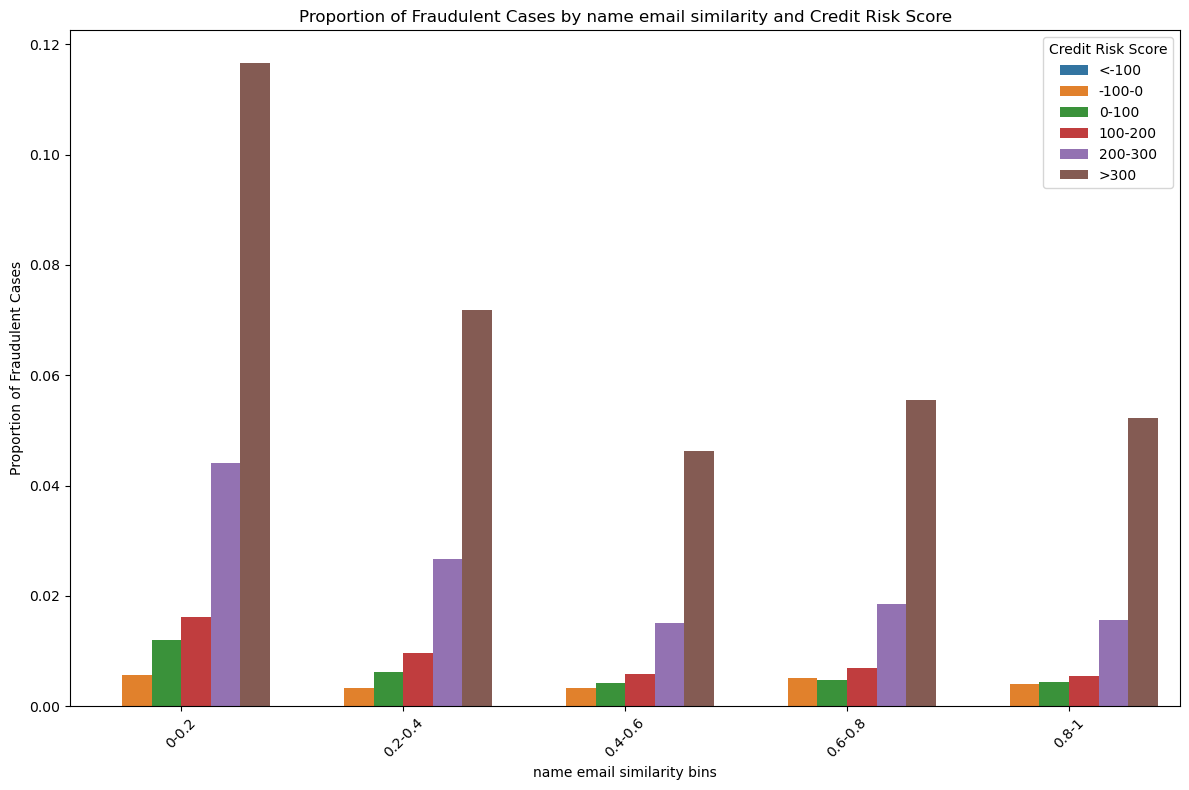

In [91]:
# test the effectiveness of using name_email_similarity and credit_risk_score as important predictor for fraud detection

# Define name_email_similarity bins
name_email_similarity_bins = pd.cut(df['name_email_similarity'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1],
                              labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1'])


# Add session length bins to the DataFrame
df['name_email_similarity_bins'] = name_email_similarity_bins

# Manually select intervals for credit risk score bins
credit_risk_score_bins = pd.cut(df['credit_risk_score'], bins=[-176, -100, 0, 100, 200, 300, 400],
                                labels=['<-100', '-100-0', '0-100', '100-200', '200-300', '>300'])



# Add credit risk score bins to the DataFrame
df['credit_risk_score_bins'] = credit_risk_score_bins

# Group by credit risk score and session length bins, calculate proportion of fraudulent cases
fraud_proportion_by_bin = df.groupby(['credit_risk_score_bins', 'name_email_similarity_bins'])['fraud_bool'].mean().reset_index()

# Plot the relationship between session length bins and proportion of fraudulent cases for each credit risk score bin
plt.figure(figsize=(12, 8))
sns.barplot(x='name_email_similarity_bins', y='fraud_bool', hue='credit_risk_score_bins', data=fraud_proportion_by_bin)
plt.title('Proportion of Fraudulent Cases by name email similarity and Credit Risk Score')
plt.xlabel('name email similarity bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.legend(title='Credit Risk Score')
plt.tight_layout()
plt.show()

In [92]:
# consistent with above findings
# lower name email similarity likely to be fraud
# higher credit risk score is indicative of higher fraud occurences

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [27]:
# Split the dataset
X = df[['name_email_similarity', 'credit_risk_score']]  # predictor features
y = df['fraud_bool']  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Feature Engineering
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# model for hypothesis 1

In [62]:
# Separate fraudulent and legitimate samples
fraudulent_samples = df[df['fraud_bool'] == 1]
legitimate_samples = df[df['fraud_bool'] == 0]

# Determine the number of fraudulent samples
num_fraudulent_samples = fraudulent_samples.shape[0]

# Randomly select legitimate samples to maintain the desired ratio
num_legitimate_samples_to_keep = 5 * num_fraudulent_samples
selected_legitimate_samples = legitimate_samples.sample(n=num_legitimate_samples_to_keep, random_state=42)

# Combine fraudulent samples with selected legitimate samples
df_resampled = pd.concat([fraudulent_samples, selected_legitimate_samples])

# Split the resampled data into features (X_resampled) and target (y_resampled)
X_resampled = df[['name_email_similarity', 'credit_risk_score']]  # predictor features
y_resampled = df['fraud_bool']  # target variable

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=18)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf_classifier = RandomForestClassifier()


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the classifier with best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.8s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   7.9s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.0s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   8.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.4s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.1s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  16.2s
[CV] END max_depth=3, min_samples_leaf=1, m

In [93]:
# best parameters found during grid search {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
# use random forest classifier and performs hyperparameter tuning using GridSearchCV 
# use under sampling, 1 fraudulent sample for every 5 legitimate samples.
# 80% training data


In [36]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the gradient boosting classifier
gbm_classifier = GradientBoostingClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],  # Example hyperparameter for controlling sampling strategy
}


grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)


# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the classifier with best parameters
best_gbm_classifier = grid_search.best_estimator_
best_gbm_classifier.fit(X_train_resampled, y_train_resampled)




# Predictions on the test set
y_pred = best_gbm_classifier.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)





Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   1.0s
[CV] END

In [38]:
# best parameters found during grid search {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
# use gradient boosting classifier and performs hyperparameter tuning using GridSearchCV 
# use under sampling, 1 fraudulent sample for every 5 legitimate samples.

# hypothesis 2: high name_email_similarity is indicative of lower fraud rates.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


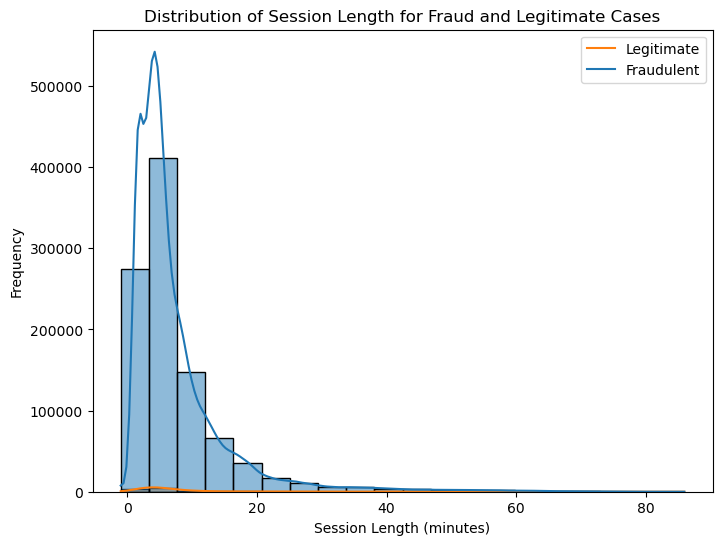

T-Statistic: 8.999825408764696
P-Value: 2.264571129440964e-19
Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.


In [63]:
# hypothesis 2
# high name_email_similarity is indicative of lower fraud rates.

# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

# Exploratory Data Analysis
plt.figure(figsize=(8, 6))

# Session Length Distribution
sns.histplot(data=df, x='session_length_in_minutes', hue='fraud_bool', bins=20, kde=True)
plt.title('Distribution of Session Length for Fraud and Legitimate Cases')
plt.xlabel('Session Length (minutes)')
plt.ylabel('Frequency')
plt.legend(['Legitimate', 'Fraudulent'])
plt.show()

# Statistical Testing
t_stat, p_value = ttest_ind(fraudulent_accounts['session_length_in_minutes'].dropna(), 
                            legitimate_accounts['session_length_in_minutes'].dropna())

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in session length between fraud and legitimate cases.")

In [41]:
#conclude significant difference in session length between fraud and legit cases.
#significantly longer session lengths observed for legitimate cases compared to fraudulent cases support the hypothesis that legitimate applicants tend to spend more time engaging in the application process.
#fraudulent accounts may exhibit shorter session lengths as fraudsters may rush through the process to avoid detection or due to their familiarity with fraudulent practices.


In [43]:
# test for normality of predictive features

# Shapiro-Wilk test for session length of fraudulent accounts


# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

shapiro_stat_fraud, p_value_fraud = shapiro(fraudulent_accounts['session_length_in_minutes'].dropna())
print("Shapiro-Wilk test for session length of fraudulent accounts:")
print("Statistic:", shapiro_stat_fraud)
print("P-Value:", p_value_fraud)

# Shapiro-Wilk test for session length of legitimate accounts
shapiro_stat_legit, p_value_legit = shapiro(legitimate_accounts['session_length_in_minutes'].dropna())
print("\nShapiro-Wilk test for session length of legitimate accounts:")
print("Statistic:", shapiro_stat_legit)
print("P-Value:", p_value_legit)

Shapiro-Wilk test for session length of fraudulent accounts:
Statistic: 0.6363271474838257
P-Value: 0.0

Shapiro-Wilk test for session length of legitimate accounts:
Statistic: 0.6746716499328613
P-Value: 0.0


In [44]:
# both cases the p-values are extremely small shows that have evidence to suggest that the session length for both fraud and legit accounts do not follow a normal distribution

In [45]:
# since 'session_length_in_minutes' not normal, use Mann-Whitney U test to check

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(fraudulent_accounts['session_length_in_minutes'], 
                                   legitimate_accounts['session_length_in_minutes'])

print("Mann-Whitney U Test Statistic:", statistic)
print("P-Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in session length between fraud and legitimate cases.")


Mann-Whitney U Test Statistic: 5517591913.0
P-Value: 0.03401733619384683
Reject the null hypothesis. There is a significant difference in session length between fraud and legitimate cases.


In [46]:
# reject null hypothesis of theres no difference in session length between fraudulent and legitimate accounts.
# p value small < 0.05  means that there is sufficient evidence to conclude that there is a significant difference in session length between fraudulent and legitimate cases.
# applicants with longer session lengths are less likely to be involved in fraud compared to those with shorter session lengths. 

/tmp/ipykernel_93010/4181441662.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin = df.groupby('session_length_bins')['fraud_bool'].mean()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


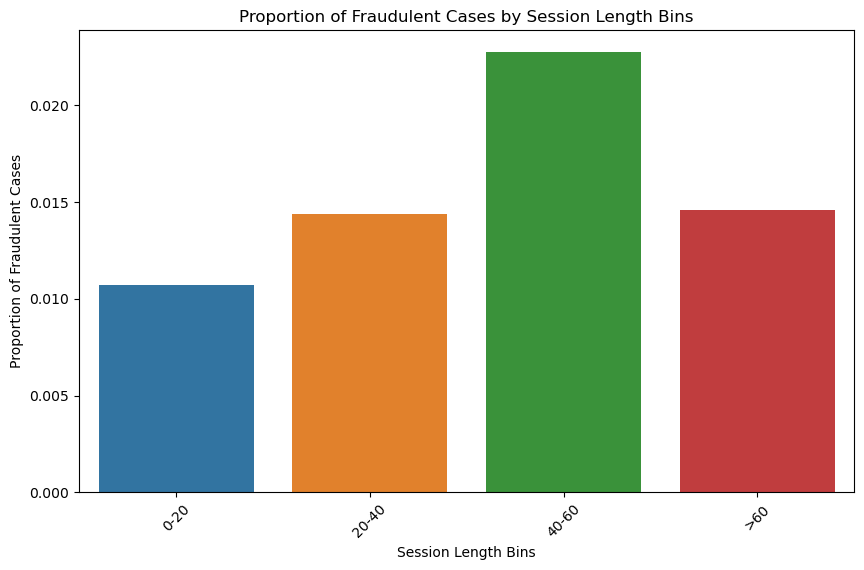

Chi-square Statistic: 195.5155992668295
P-Value: 3.927012708613344e-42
Reject the null hypothesis. There is a significant association between session length bins and fraud occurrence.


In [47]:
# # alternative is use feature engineering
# create categorical bins using 'session_length_in_minutes'and visualize the distribution of the new categorical feature for fraud and legit cases
# transform the continuous session_length_in_minutes feature into a categorical feature



# Define categorical bins for session lengths
session_length_bins = pd.cut(df['session_length_in_minutes'], bins=[0, 20, 40, 60, 300],
                              labels=['0-20', '20-40', '40-60', '>60'])

# Add session length bins to the DataFrame
df['session_length_bins'] = session_length_bins

# Calculate the proportion of fraudulent cases in each session length bin
fraud_proportion_by_bin = df.groupby('session_length_bins')['fraud_bool'].mean()

# Plot the relationship between session length bins and the proportion of fraudulent cases
plt.figure(figsize=(10, 6))
sns.barplot(x=fraud_proportion_by_bin.index, y=fraud_proportion_by_bin.values)
plt.title('Proportion of Fraudulent Cases by Session Length Bins')
plt.xlabel('Session Length Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.show()

# Conduct statistical testing (e.g., chi-square test)
# Chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(pd.crosstab(df['session_length_bins'], df['fraud_bool']))

print("Chi-square Statistic:", chi2_stat)
print("P-Value:", p_val)

alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant association between session length bins and fraud occurrence.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between session length bins and fraud occurrence.")


In [52]:
# null hypothesis: no association between session length bins and fraud occurrence
# rej null to conclude that there is a significant association between session length bins and fraud occurrence
# different session length bins are associated with different rates of fraudulent activity

# longer sessions = higher fraud rates?



# to note:
# proportion of fraud in each bin = number of fraud accs in the bin / total number of accs in the bin

/tmp/ipykernel_93010/3494785576.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin = df.groupby(['credit_risk_score_bins', 'session_length_bins'])['fraud_bool'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


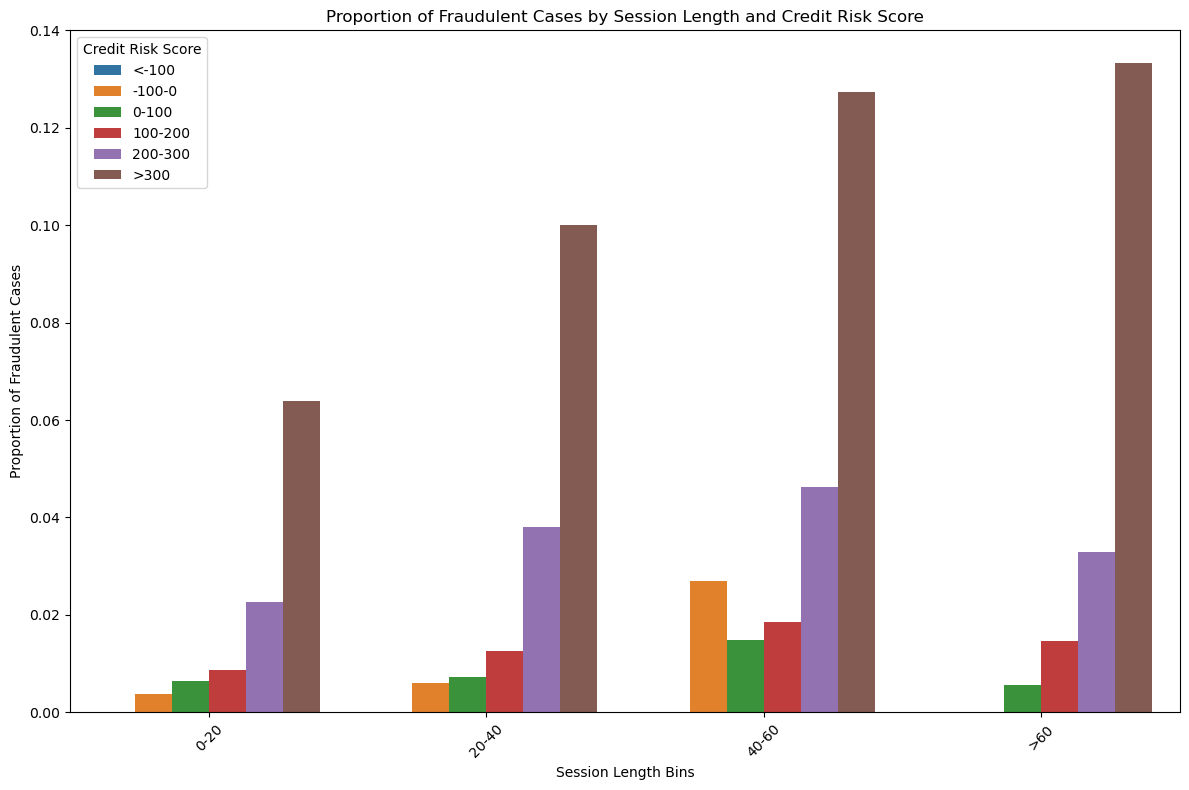

In [51]:
# test the effectiveness of using session_length_in_minutes and credit_risk_score as important predictor for fraud detection

# Define session length bins
session_length_bins = pd.cut(df['session_length_in_minutes'], bins=[0, 20, 40, 60, 300],
                              labels=['0-20', '20-40', '40-60', '>60'])



# Add session length bins to the DataFrame
df['session_length_bins'] = session_length_bins

# Manually select intervals for credit risk score bins
credit_risk_score_bins = pd.cut(df['credit_risk_score'], bins=[-176, -100, 0, 100, 200, 300, 400],
                                labels=['<-100', '-100-0', '0-100', '100-200', '200-300', '>300'])



# Add credit risk score bins to the DataFrame
df['credit_risk_score_bins'] = credit_risk_score_bins

# Group by credit risk score and session length bins, calculate proportion of fraudulent cases
fraud_proportion_by_bin = df.groupby(['credit_risk_score_bins', 'session_length_bins'])['fraud_bool'].mean().reset_index()

# Plot the relationship between session length bins and proportion of fraudulent cases for each credit risk score bin
plt.figure(figsize=(12, 8))
sns.barplot(x='session_length_bins', y='fraud_bool', hue='credit_risk_score_bins', data=fraud_proportion_by_bin)
plt.title('Proportion of Fraudulent Cases by Session Length and Credit Risk Score')
plt.xlabel('Session Length Bins')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.legend(title='Credit Risk Score')
plt.tight_layout()
plt.show()

In [50]:
# consistent with above results, longer sessions = higher fraud rates?
# higher credit_risk_score = higher fraud rates

# model for hypothesis 2

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler

# Separate fraudulent and legitimate samples
fraudulent_samples = df[df['fraud_bool'] == 1]
legitimate_samples = df[df['fraud_bool'] == 0]

# Determine the number of fraudulent samples
num_fraudulent_samples = fraudulent_samples.shape[0]

# Randomly select legitimate samples to maintain the desired ratio
num_legitimate_samples_to_keep = 5 * num_fraudulent_samples
selected_legitimate_samples = legitimate_samples.sample(n=num_legitimate_samples_to_keep, random_state=42)

# Combine fraudulent samples with selected legitimate samples
df_resampled = pd.concat([fraudulent_samples, selected_legitimate_samples])

# Split the resampled data into features (X_resampled) and target (y_resampled)
X_resampled = df_resampled[['session_length_in_minutes', 'credit_risk_score']]
y_resampled = df_resampled['fraud_bool']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=18)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the classifier with best parameters
best_gbm_classifier = grid_search.best_estimator_
best_gbm_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_gbm_classifier.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   1.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   3.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Separate fraudulent and legitimate samples
fraudulent_samples = df[df['fraud_bool'] == 1]
legitimate_samples = df[df['fraud_bool'] == 0]

# Determine the number of fraudulent samples
num_fraudulent_samples = fraudulent_samples.shape[0]

# Randomly select legitimate samples to maintain the desired ratio
num_legitimate_samples_to_keep = 5 * num_fraudulent_samples
selected_legitimate_samples = legitimate_samples.sample(n=num_legitimate_samples_to_keep, random_state=42)

# Combine fraudulent samples with selected legitimate samples
df_resampled = pd.concat([fraudulent_samples, selected_legitimate_samples])

# Split the resampled data into features (X_resampled) and target (y_resampled)
X_resampled = df_resampled[['session_length_in_minutes', 'credit_risk_score']]
y_resampled = df_resampled['fraud_bool']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=18)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Initialize models
log_reg = LogisticRegression()
rf_classifier = RandomForestClassifier()
gbm_classifier = GradientBoostingClassifier()

# Define classifiers and their names
classifiers = [log_reg, rf_classifier, gbm_classifier]
classifier_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting Machine']

# Define classifiers and their parameter grids for hyperparameter tuning
classifiers = [
    (log_reg, {'C': [0.001, 0.01, 0.1, 1, 10, 100]}),
    (rf_classifier, {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}),
    (gbm_classifier, {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2]})
]



# Perform hyperparameter tuning and k-fold cross-validation for each classifier
for classifier, param_grid in classifiers:
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    
    best_classifier = grid_search.best_estimator_
    best_classifier.fit(X_train_scaled, y_train)
    
    # Predictions on the test set
    y_pred = best_classifier.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Best Classifier - Accuracy ({classifier.__class__.__name__}):", accuracy)

    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)

    class_report = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_report)









Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

In [69]:
# hyperparameter tuning for each classifier using GridSearchCV and evaluate each tuned model's performance using k-fold cross-validation, k=5

# Accuracy (LogisticRegression): 0.8337740838685304
#                 precision    recall  f1-score   support

#          0       0.83      1.00      0.91     11022
#          1       0.64      0.01      0.03      2213

# Accuracy (RandomForestClassifier): 0.8352096713260294
#                 precision    recall  f1-score   support

#           0       0.84      0.99      0.91     11022
#           1       0.61      0.04      0.08      2213

# Accuracy (GradientBoostingClassifier): 0.8341518700415564
#                precision    recall  f1-score   support

#          0       0.84      0.99      0.91     11022
#          1       0.53      0.08      0.14      2213

# hypothesis 3: lower number of distinct emails is indicative of higher fraud rates.

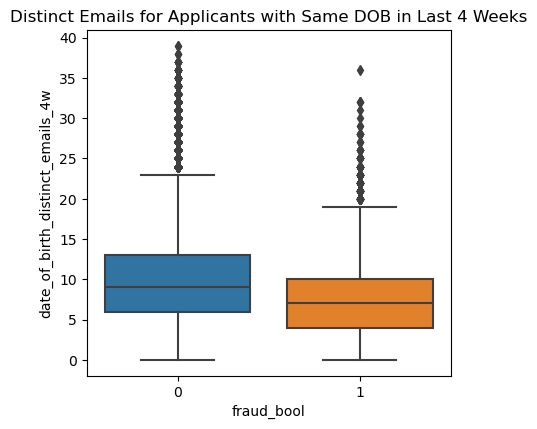

Column: date_of_birth_distinct_emails_4w
T-Statistic: -43.26409621855827
P-Value: 0.0
Reject the null hypothesis. There is a significant difference in date_of_birth_distinct_emails_4w between fraud and legitimate cases.




In [71]:
# Subset data for fraudulent and legitimate accounts
fraudulent_accounts = df[df['fraud_bool'] == 1]
legitimate_accounts = df[df['fraud_bool'] == 0]

# Exploratory Data Analysis
plt.figure(figsize=(12, 8))


# Email History
plt.subplot(2, 3, 4)
sns.boxplot(x='fraud_bool', y='date_of_birth_distinct_emails_4w', data=df)
plt.title('Distinct Emails for Applicants with Same DOB in Last 4 Weeks')



plt.tight_layout()
plt.show()

# Statistical Testing
columns_of_interest = ['date_of_birth_distinct_emails_4w']
for column in columns_of_interest:
    t_stat, p_value = ttest_ind(fraudulent_accounts[column].dropna(), 
                                legitimate_accounts[column].dropna())
    print(f"Column: {column}")
    print("T-Statistic:", t_stat)
    print("P-Value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in", column, "between fraud and legitimate cases.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in", column, "between fraud and legitimate cases.")
    print("\n")

In [73]:

# small p-value indicate a significant difference in date_of_birth_distinct_emails_4w between fraud and legit cases.
# possibly suggest that fraud accounts tend to have a significantly lower number of distinct emails for applicants with the same date of birth in the last 4 weeks compared to legit accounts

#fraudsters may attempt to use the same date of birth across multiple fraud applications (using bots to spam apply), resulting in a lower number of distinct emails associated with that date of birth.



#this supports the hypothesis that certain applicant history features, such as the number of distinct emails associated with the same date of birth are correlated with fraud behavior
#banks can leverage these insights to enhance their fraud detection and prevention strategies. For example, they can use the number of distinct emails associated with the same date of birth as a red flag for potential fraudulent activity, or shorter bank account histories may warrant additional scrutiny during the account approval process


/tmp/ipykernel_93010/2913694626.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin = df.groupby('emails_bin')['fraud_bool'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


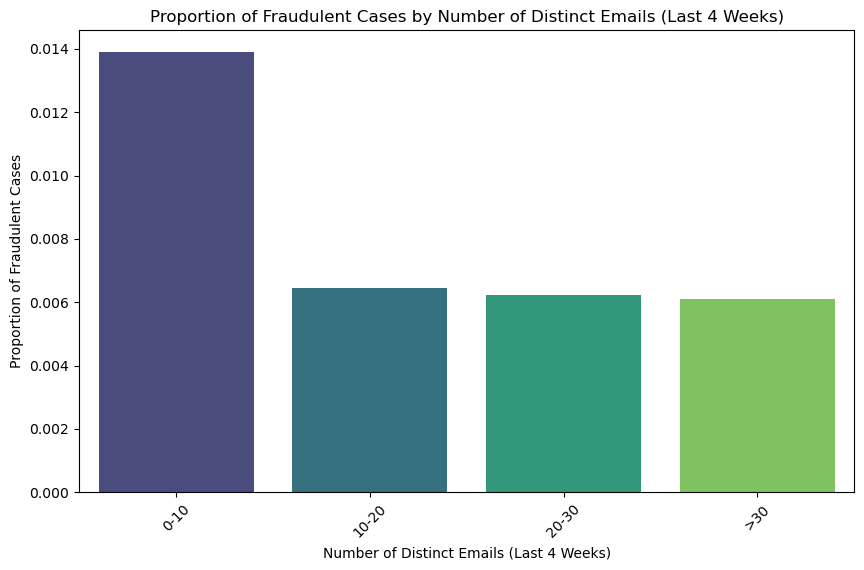

In [74]:


# Define the bin edges and labels for categorical binning
bin_edges = [0, 10, 20, 30, 50]  # Define your own bin edges as needed
bin_labels = ['0-10', '10-20', '20-30', '>30']  # Define corresponding labels

# Perform categorical binning
df['emails_bin'] = pd.cut(df['date_of_birth_distinct_emails_4w'], bins=bin_edges, labels=bin_labels)

# Assuming df contains the dataset with columns 'emails_bin' and 'fraud_bool'

# Calculate the proportion of fraudulent cases for each bin
fraud_proportion_by_bin = df.groupby('emails_bin')['fraud_bool'].mean().reset_index()

# Plot the relationship between bins and proportion of fraudulent cases
plt.figure(figsize=(10, 6))
sns.barplot(x='emails_bin', y='fraud_bool', data=fraud_proportion_by_bin, palette='viridis')
plt.title('Proportion of Fraudulent Cases by Number of Distinct Emails (Last 4 Weeks)')
plt.xlabel('Number of Distinct Emails (Last 4 Weeks)')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.show()

In [75]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['emails_bin'], df['fraud_bool'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

print("Chi-square Statistic:", chi2)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between 'emails_bin' and fraud occurrence.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between 'emails_bin' and fraud occurrence.")

Chi-square Statistic: 1217.6179922113074
P-Value: 1.1032254840199512e-263
Reject the null hypothesis. There is a significant association between 'emails_bin' and fraud occurrence.


In [79]:
# suggests a substantial degree of association between the number of distinct emails (email bins) and fraud occurrence
# can conclude the association between the 2 features

In [77]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model
model = ols('fraud_bool ~ emails_bin', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


                  sum_sq        df         F         PR(>F)
emails_bin     13.222255       3.0  406.3665  7.627917e-264
Residual    10831.385676  998660.0       NaN            NaN


In [78]:
# 'fraud_bool' is the outcome variable and 'emails_bin' is the predictor variable.
# specify typ=2 for Type 2 ANOVA, suitable for unbalanced designs.

# small p value indicate number of distinct emails is associated with the different fraud occurrence. 

# can conclude fraud accounts highly likely to have lower number of distinct emails for applicants with the same date of birth in the last 4 weeks

/tmp/ipykernel_93010/3900524074.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_proportion_by_bin_and_score = df.groupby(['emails_bin', 'credit_risk_score_bin'])['fraud_bool'].mean().reset_index()
/opt/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


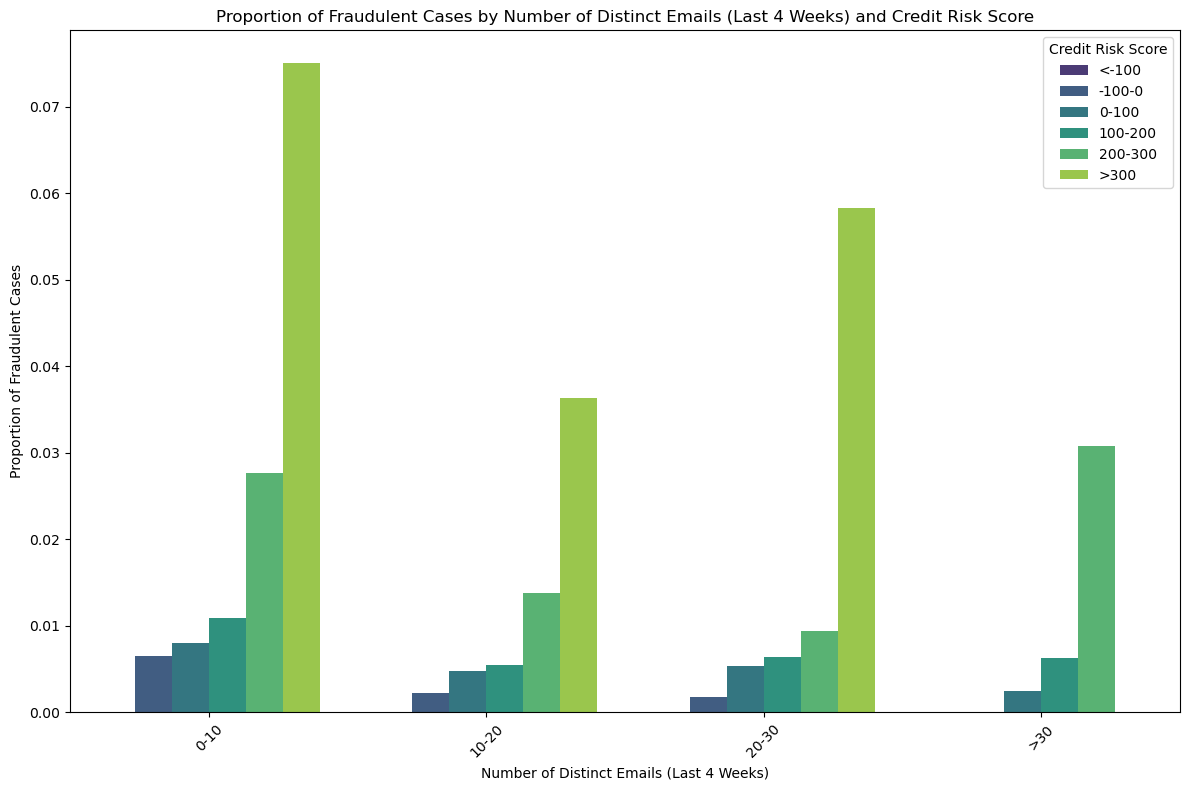

In [80]:
# Define custom bin edges and labels for 'credit_risk_score'
credit_score_bin_edges = [-176, -100, 0, 100, 200, 300, 400] # Define your own custom bin edges
credit_score_bin_labels = ['<-100', '-100-0', '0-100', '100-200', '200-300', '>300']  # Define corresponding labels

# Perform categorical binning for 'credit_risk_score'
df['credit_risk_score_bin'] = pd.cut(df['credit_risk_score'], bins=credit_score_bin_edges, labels=credit_score_bin_labels)

# Group data by 'emails_bin' and 'credit_risk_score_bin' and calculate the mean of 'fraud_bool'
fraud_proportion_by_bin_and_score = df.groupby(['emails_bin', 'credit_risk_score_bin'])['fraud_bool'].mean().reset_index()

# Plot the relationship between bins and proportion of fraudulent cases for each credit risk score bin
plt.figure(figsize=(12, 8))
sns.barplot(x='emails_bin', y='fraud_bool', hue='credit_risk_score_bin', data=fraud_proportion_by_bin_and_score, palette='viridis')
plt.title('Proportion of Fraudulent Cases by Number of Distinct Emails (Last 4 Weeks) and Credit Risk Score')
plt.xlabel('Number of Distinct Emails (Last 4 Weeks)')
plt.ylabel('Proportion of Fraudulent Cases')
plt.xticks(rotation=45)
plt.legend(title='Credit Risk Score')
plt.tight_layout()
plt.show()

In [81]:
from scipy.stats import chi2_contingency

# Group data by 'emails_bin'
grouped_data = df.groupby('emails_bin')

# Perform chi-square test for each group
for name, group in grouped_data:
    contingency_table = pd.crosstab(group['credit_risk_score_bin'], group['fraud_bool'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square Statistic for {name}: {chi2}")
    print(f"P-Value for {name}: {p}")
    if p < 0.05:
        print("Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.")
    else:
        print("Fail to reject the null hypothesis.")
    print()

/tmp/ipykernel_93010/3068512564.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('emails_bin')


Chi-square Statistic for 0-10: 4678.808876630494
P-Value for 0-10: 0.0
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for 10-20: 891.2579899466193
P-Value for 10-20: 2.075255119455771e-190
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for 20-30: 60.04589827391419
P-Value for 20-30: 1.1891995640521045e-11
Reject the null hypothesis. There is a significant association between 'credit_risk_score_bin' and fraud occurrence in this group.

Chi-square Statistic for >30: 7.606145511696632
P-Value for >30: 0.17931925142841448
Fail to reject the null hypothesis.



In [83]:
# for the bins : 0-10, 10-20, 20-30, 
# significant association between email_bins,credit_risk_score and fraud occurence 

# consistent results that fraud accounts likely to have lower number of distinct emails for applicants with the same date of birth in the last 4 weeks

# consistent results of higher credit_risk_score lead to higher fraud rates

# model for hypothesis 3

In [85]:
# Separate fraudulent and legitimate samples
fraudulent_samples = df[df['fraud_bool'] == 1]
legitimate_samples = df[df['fraud_bool'] == 0]

# Determine the number of fraudulent samples
num_fraudulent_samples = fraudulent_samples.shape[0]

# Randomly select legitimate samples to maintain the desired ratio
num_legitimate_samples_to_keep = 5 * num_fraudulent_samples
selected_legitimate_samples = legitimate_samples.sample(n=num_legitimate_samples_to_keep, random_state=42)

# Combine fraudulent samples with selected legitimate samples
df_resampled = pd.concat([fraudulent_samples, selected_legitimate_samples])

# Split the resampled data into features (X_resampled) and target (y_resampled)
X_resampled = df_resampled[['date_of_birth_distinct_emails_4w', 'credit_risk_score']]
y_resampled = df_resampled['fraud_bool']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=18)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gbm_classifier = GradientBoostingClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

grid_search = GridSearchCV(estimator=gbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the classifier with best parameters
best_gbm_classifier = grid_search.best_estimator_
best_gbm_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_gbm_classifier.predict(X_test_scaled)

# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [86]:
# Separate fraudulent and legitimate samples
fraudulent_samples = df[df['fraud_bool'] == 1]
legitimate_samples = df[df['fraud_bool'] == 0]

# Determine the number of fraudulent samples
num_fraudulent_samples = fraudulent_samples.shape[0]

# Randomly select legitimate samples to maintain the desired ratio
num_legitimate_samples_to_keep = 5 * num_fraudulent_samples
selected_legitimate_samples = legitimate_samples.sample(n=num_legitimate_samples_to_keep, random_state=42)

# Combine fraudulent samples with selected legitimate samples
df_resampled = pd.concat([fraudulent_samples, selected_legitimate_samples])

# Split the resampled data into features (X_resampled) and target (y_resampled)
X_resampled = df_resampled[['date_of_birth_distinct_emails_4w', 'credit_risk_score']]
y_resampled = df_resampled['fraud_bool']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=18)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}


grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the classifier with best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)


# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.3s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=3, min_samples_leaf=1, m

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate fraudulent and legitimate samples
fraudulent_samples = df[df['fraud_bool'] == 1]
legitimate_samples = df[df['fraud_bool'] == 0]

# Determine the number of fraudulent samples
num_fraudulent_samples = fraudulent_samples.shape[0]

# Randomly select legitimate samples to maintain the desired ratio
num_legitimate_samples_to_keep = 5 * num_fraudulent_samples
selected_legitimate_samples = legitimate_samples.sample(n=num_legitimate_samples_to_keep, random_state=42)

# Combine fraudulent samples with selected legitimate samples
df_resampled = pd.concat([fraudulent_samples, selected_legitimate_samples])

# Split the resampled data into features (X_resampled) and target (y_resampled)
X_resampled = df_resampled[['date_of_birth_distinct_emails_4w', 'credit_risk_score']]
y_resampled = df_resampled['fraud_bool']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=18)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier()



# Expanded parameter grid for Random Forest
param_dist = {
    'n_estimators': randint(50, 500),  # Expanded range for number of trees
    'max_depth': randint(5, 20),        # Expanded range for maximum depth
    'min_samples_split': randint(2, 20),# Expanded range for minimum samples split
    'min_samples_leaf': randint(1, 20)  # Expanded range for minimum samples leaf
}

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='accuracy', random_state=42, verbose=2)
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)



# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.5s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.6s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.6s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.8s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   1.6s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   2.2s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   2.2s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   2.3s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   2.3s
[CV] END max_d

In [89]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Separate fraudulent and legitimate samples
fraudulent_samples = df[df['fraud_bool'] == 1]
legitimate_samples = df[df['fraud_bool'] == 0]

# Determine the number of fraudulent samples
num_fraudulent_samples = fraudulent_samples.shape[0]

# Randomly select legitimate samples to maintain the desired ratio
num_legitimate_samples_to_keep = 5 * num_fraudulent_samples
selected_legitimate_samples = legitimate_samples.sample(n=num_legitimate_samples_to_keep, random_state=42)

# Combine fraudulent samples with selected legitimate samples
df_resampled = pd.concat([fraudulent_samples, selected_legitimate_samples])

# Split the resampled data into features (X_resampled) and target (y_resampled)
X_resampled = df_resampled[['date_of_birth_distinct_emails_4w', 'credit_risk_score', 'session_length_in_minutes']]
y_resampled = df_resampled['fraud_bool']

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=18)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_classifier = RandomForestClassifier()



# Expanded parameter grid for Random Forest
param_dist = {
    'n_estimators': randint(50, 500),  # Expanded range for number of trees
    'max_depth': randint(5, 20),        # Expanded range for maximum depth
    'min_samples_split': randint(2, 20),# Expanded range for minimum samples split
    'min_samples_leaf': randint(1, 20)  # Expanded range for minimum samples leaf
}

# Perform randomized search to find the best hyperparameters
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100,
                                   cv=5, scoring='accuracy', random_state=42, verbose=2)
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = random_search.best_params_

# Train the Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test_scaled)



# Evaluate the model
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   2.3s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   2.4s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   2.4s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   2.4s
[CV] END max_depth=11, min_samples_leaf=15, min_samples_split=12, n_estimators=121; total time=   2.6s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   3.5s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   3.6s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   3.5s
[CV] END max_depth=17, min_samples_leaf=7, min_samples_split=12, n_estimators=137; total time=   3.3s
[CV] END max_d

KeyboardInterrupt: 